# Введение в нейронные сети

## Урок 3. TensorFlow

1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность.

2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке.

3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

#import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

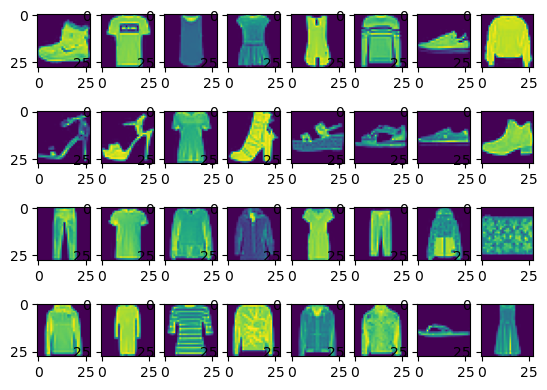

In [3]:
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(x_train[i])
plt.show()

In [4]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

### Модель 1 (семинар)

In [5]:
model1 = Sequential([
      Input(shape=(28, 28, 1)),
      Conv2D(32, padding='same', kernel_size=(3,3), activation='relu'),
      MaxPooling2D((2,2), strides=2),
      Conv2D(64, padding='same', kernel_size=(3,3), activation='relu'),
      MaxPooling2D((2,2), strides=2),
      Conv2D(128, padding='same', kernel_size=(3,3), activation='relu'),
      MaxPooling2D((2,2), strides=2),
      Flatten(),
      Dense(128, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [6]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [7]:
history1 = model1.fit(x_train,
                    y_train_cat,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test_cat)
                   )

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4376 - accuracy: 0.8421 - val_loss: 0.3269 - val_accuracy: 0.8806
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2770 - accuracy: 0.8979 - val_loss: 0.2718 - val_accuracy: 0.8999
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2326 - accuracy: 0.9141 - val_loss: 0.2705 - val_accuracy: 0.9033
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2035 - accuracy: 0.9236 - val_loss: 0.2425 - val_accuracy: 0.9136
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1771 - accuracy: 0.9339 - val_loss: 0.2458 - val_accuracy: 0.9108
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1559 - accuracy: 0.9422 - val_loss: 0.2551 - val_accuracy: 0.9125
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1355 - accuracy: 0.9487 - val_loss: 0.2414 -

In [8]:
# Получим предсказания
y_pred = np.argmax(model1.predict(x_test), axis=1)

313/313 [==============================] - 1s 4ms/step


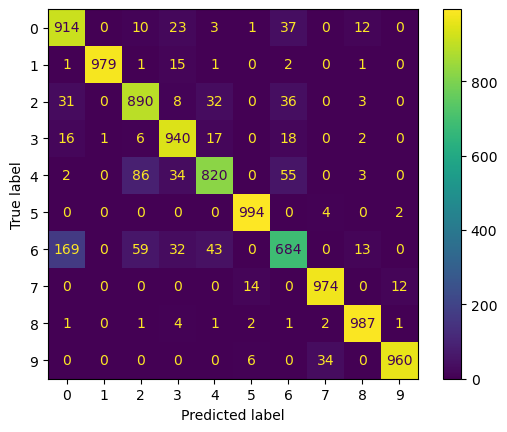

In [9]:
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Модель обучилась с довольно высоким accuracy.  
Если посмотреть precision по классам, то можно заметить "проседание" 6-го класса (shirt).

### Модель 2

Немного уменьшим количество нейронов на последнем скрытом слое, настроим защиту от переобучения и увеличим количество эпох.

In [41]:
model2 = Sequential([
      Input(shape=(28, 28, 1)),
      Conv2D(32, padding='same', kernel_size=(3,3), activation='relu'),
      MaxPooling2D((2,2), strides=2),
      Conv2D(64, padding='same', kernel_size=(3,3), activation='relu'),
      MaxPooling2D((2,2), strides=2),
      Conv2D(128, padding='same', kernel_size=(3,3), activation='relu'),
      MaxPooling2D((2,2), strides=2),
      Flatten(),
      Dense(90, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 128)       

In [42]:
# Настраиваем защиту от переобучения
# Если метрика 'val_accuracy' продолжает снижение два шага подряд, то выходим из процесса обучения
erly_stoping_callback = EarlyStopping(monitor='val_accuracy', patience=2)

In [43]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

In [44]:
history2 = model2.fit(x_train,
                y_train_cat,
                batch_size=32,
                epochs=20,
                verbose=1,
                validation_data=(x_test, y_test_cat),
                callbacks=[erly_stoping_callback]
               )   

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4456 - accuracy: 0.8367 - val_loss: 0.3514 - val_accuracy: 0.8724
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2843 - accuracy: 0.8952 - val_loss: 0.2819 - val_accuracy: 0.8966
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2401 - accuracy: 0.9113 - val_loss: 0.2757 - val_accuracy: 0.8990
Epoch 4/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2084 - accuracy: 0.9236 - val_loss: 0.2483 - val_accuracy: 0.9135
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1827 - accuracy: 0.9317 - val_loss: 0.2533 - val_accuracy: 0.9059
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1601 - accuracy: 0.9400 - val_loss: 0.2261 - val_accuracy: 0.9181
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1435 - accuracy: 0.9468 - val_loss: 0.2511 -

In [45]:
# Получим предсказания
y_pred = np.argmax(model2.predict(x_test), axis=1)

313/313 [==============================] - 1s 4ms/step


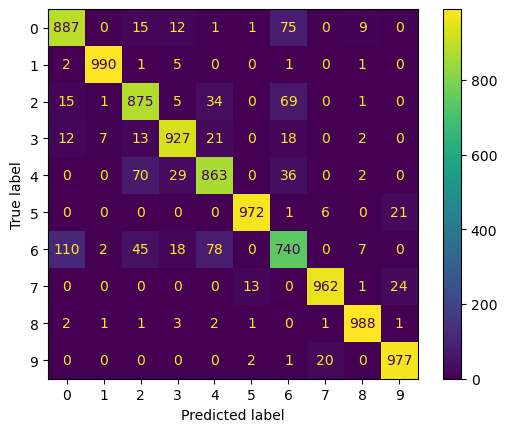

In [46]:
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [47]:
history1.history['val_accuracy'][-1], history2.history['val_accuracy'][-1]

(0.9142000079154968, 0.9180999994277954)

Не удалось добиться значительного повышения accuracy.  
Получилось повысить precision у 6-го класса (shirt), но при этом уменьшился у 0-го класса (t-shirt).